<h2>
Param.ai Task 2<br>
Chennai Hotel Reviews
</h2>
<br>

In [1]:
#Import Useful Libraries
import numpy as np
import pandas as pd
import re

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


#NLP Related Libraries
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import nltk
from textblob import TextBlob


In [2]:
#Import dataset
df = pd.read_csv('C:/Users/MUJ/Downloads/hotel-reviews-from-chennai-india/chennai_reviews.csv')
df.head()

,Hotel_name,Review_Title,Review_Text,Sentiment,Rating_Percentage,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Accord Metropolitan,Excellent comfortableness during stay,Its really nice place to stay especially for b...,3,100,NaN,NaN,NaN,NaN
1,Accord Metropolitan,Not too comfortable,It seems that hotel does not check the basic a...,1,20,NaN,NaN,NaN,NaN
2,Accord Metropolitan,NaN,Worst hotel I have ever encountered. I will ne...,1,20,NaN,NaN,NaN,NaN
3,Accord Metropolitan,Best hotel,Had a good time in this hotel and the staff Ku...,3,100,NaN,NaN,NaN,NaN
4,Accord Metropolitan,NaN,good hotel and staff Veg food good non veg bre...,3,100,NaN,NaN,NaN,NaN


<hr>
<h3>
EXPLORATORY DATA ANALYSIS</h3>
<br><hr>

In [3]:
#Describe the shape (rows,columns)
df.shape

(4768, 9)

In [4]:
#Describe the data types of every column values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4768 entries, 0 to 4767
Data columns (total 9 columns):
Hotel_name           4768 non-null object
Review_Title         4341 non-null object
Review_Text          4767 non-null object
Sentiment            4766 non-null object
Rating_Percentage    4767 non-null object
Unnamed: 5           64 non-null float64
Unnamed: 6           3 non-null object
Unnamed: 7           1 non-null float64
Unnamed: 8           1 non-null float64
dtypes: float64(3), object(6)
memory usage: 335.3+ KB


<hr>
<h3>
CLEANING AND PREPROCESSING THE DATASET
</h3>
<br><hr>

In [5]:
#Remove noisy data from column 6,7,8,9
#Remove the columns that have 'unnamed' in the column name
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,Hotel_name,Review_Title,Review_Text,Sentiment,Rating_Percentage
0,Accord Metropolitan,Excellent comfortableness during stay,Its really nice place to stay especially for b...,3,100
1,Accord Metropolitan,Not too comfortable,It seems that hotel does not check the basic a...,1,20
2,Accord Metropolitan,NaN,Worst hotel I have ever encountered. I will ne...,1,20
3,Accord Metropolitan,Best hotel,Had a good time in this hotel and the staff Ku...,3,100
4,Accord Metropolitan,NaN,good hotel and staff Veg food good non veg bre...,3,100


In [6]:
#Replace empty cells with 'Unavailable' in Review_Title column 
values = {'Hotel_name': 'Unavailable', 'Review_Title': 'Unavailable', 'Review_Text': 'Unavailable'}
df = df.fillna(value=values)
df.head()


,Hotel_name,Review_Title,Review_Text,Sentiment,Rating_Percentage
0,Accord Metropolitan,Excellent comfortableness during stay,Its really nice place to stay especially for b...,3,100
1,Accord Metropolitan,Not too comfortable,It seems that hotel does not check the basic a...,1,20
2,Accord Metropolitan,Unavailable,Worst hotel I have ever encountered. I will ne...,1,20
3,Accord Metropolitan,Best hotel,Had a good time in this hotel and the staff Ku...,3,100
4,Accord Metropolitan,Unavailable,good hotel and staff Veg food good non veg bre...,3,100


In [7]:
#Replace noisy data in column Sentiment and Rating_Percentage with column mean value
df['Sentiment'] = df['Sentiment'].str.replace(r'[^0-9]','')
df['Rating_Percentage'] = df['Rating_Percentage'].str.replace(r'[^0-9]+','')

#Remove white spaces
df['Sentiment'] = df['Sentiment'].str.replace(r'[s+]','')

#Fill missing values
df['Sentiment'] = df['Sentiment'].fillna(2)
df['Rating_Percentage'] = df['Rating_Percentage'].fillna(72)


In [8]:
df.head()

,Hotel_name,Review_Title,Review_Text,Sentiment,Rating_Percentage
0,Accord Metropolitan,Excellent comfortableness during stay,Its really nice place to stay especially for b...,3,100
1,Accord Metropolitan,Not too comfortable,It seems that hotel does not check the basic a...,1,20
2,Accord Metropolitan,Unavailable,Worst hotel I have ever encountered. I will ne...,1,20
3,Accord Metropolitan,Best hotel,Had a good time in this hotel and the staff Ku...,3,100
4,Accord Metropolitan,Unavailable,good hotel and staff Veg food good non veg bre...,3,100


<hr>
<h3>
VISUALIZATION OF DATASET</h3>
<br><hr>

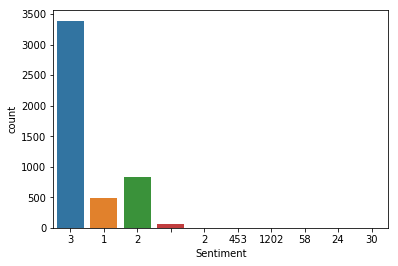

In [9]:
#Count Plot for Sentiment Values
sns.countplot(df['Sentiment'])

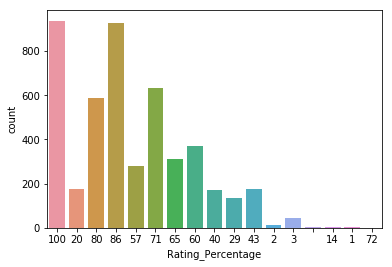

In [10]:
#Count Plot for Rating Percentage
sns.countplot(df['Rating_Percentage'])


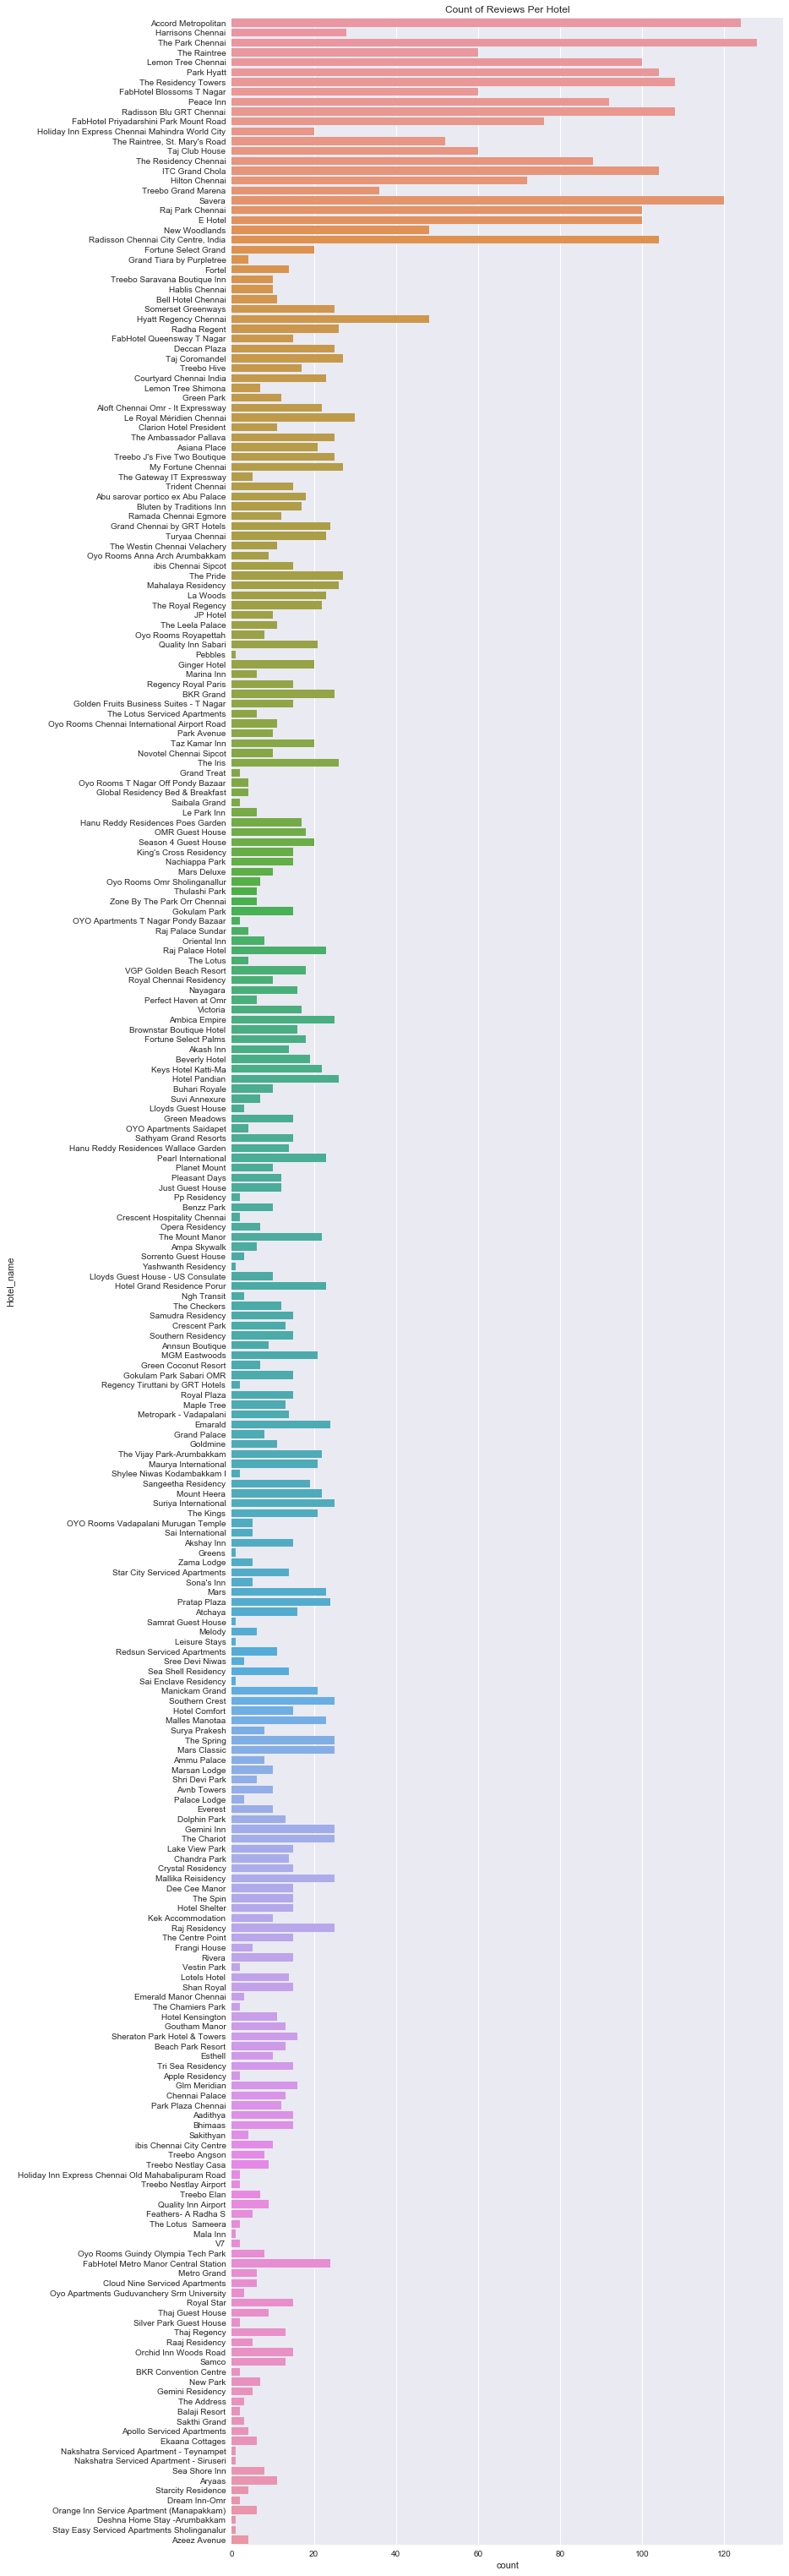

In [11]:
#Count plot of the Hotel Names
sns.set(rc={'figure.figsize':(11.7,55)})
sns.countplot(y=df['Hotel_name'],data=df).set_title('Count of Reviews Per Hotel')
sns.despine()

<hr>
<h3>
Natural Language Processing 
& Sentiment Analysis</h3>
<br><hr>

In [12]:
#Sentiment Analysis of Review Title and Review Text

#Preprocessing value

#Convert to lower case
def preprocess(column_name):
    column_name = column_name.str.lower()
    column_name = column_name.str.replace(r"^[a-zA-Z]\s+","")
    column_name = column_name.str.replace(r"wouldn't","would not")
    column_name = column_name.str.replace(r"ain't","am not")
    column_name = column_name.str.replace(r"isn't","is not")
    column_name = column_name.str.replace(r"aren't","are not")
    column_name = column_name.str.replace(r"can't","can not")
    column_name = column_name.str.replace(r"shouldn't","should not")
    column_name = column_name.str.replace(r"shan't","shall not")
    column_name = column_name.str.replace(r"won't","will not")
    column_name = column_name.str.replace(r"hasn't","has not")
    column_name = column_name.str.replace(r"hadn't","had not")
    column_name = column_name.str.replace(r"don't","do not")
    column_name = column_name.str.replace(r"couldn't","could not")
    column_name = column_name.str.replace(r"didn't","did not")
    column_name = column_name.str.replace(r"aint","am not")
    column_name = column_name.str.replace(r"isnt","is not")
    column_name = column_name.str.replace(r"wouldnt","would not")
    column_name = column_name.str.replace(r"aint","am not")
    column_name = column_name.str.replace(r"isnt","is not")
    column_name = column_name.str.replace(r"arent","are not")
    column_name = column_name.str.replace(r"cant","can not")
    column_name = column_name.str.replace(r"shouldnt","should not")
    column_name = column_name.str.replace(r"shant","shall not")
    column_name = column_name.str.replace(r"wont","will not")
    column_name = column_name.str.replace(r"hasnt","has not")
    column_name = column_name.str.replace(r"hadnt","had not")
    column_name = column_name.str.replace(r"dont","do not")
    column_name = column_name.str.replace(r"couldnt","could not")
    column_name = column_name.str.replace(r"didnt","did not")
    column_name = column_name.str.replace(r"aint","am not")
    column_name = column_name.str.replace(r"isnt","is not")    

    
    return column_name

In [13]:
df.Review_Title = preprocess(df.Review_Title)
df.Review_Text = preprocess(df.Review_Text)
df.head()

,Hotel_name,Review_Title,Review_Text,Sentiment,Rating_Percentage
0,Accord Metropolitan,excellent comfortableness during stay,its really nice place to stay especially for b...,3,100
1,Accord Metropolitan,not too comfortable,it seems that hotel does not check the basic a...,1,20
2,Accord Metropolitan,unavailable,worst hotel i have ever encountered. i will ne...,1,20
3,Accord Metropolitan,best hotel,had a good time in this hotel and the staff ku...,3,100
4,Accord Metropolitan,unavailable,good hotel and staff veg food good non veg bre...,3,100


In [14]:
#TODO: Implement remove_not() for dataframe values
'''
def remove_not():
    for i in range(df.Review_Title.size):
        words = nltk.word_tokenize(df.Review_Title[i])
        new_words = []
        temp_word = ""
        for word in words:
            antonyms = []
            if word == "not":
                temp_word = "not_"
            elif temp_word == "not_":
                for syn in wordnet.synsets(word):
                    for s in syn.lemmas():
                        for a in s.antonyms():
                            antonyms.append(a.name())
                if len(antonyms) >= 1:
                    word = antonyms[0]
                else:
                    word = temp_word + word
                temp_word = ""

            if word != "not":
                new_words.append(word)

        df.Review_Title[i] = ' '.join(new_words) 


    return df.Review_Title
remove_not()
'''

'\ndef remove_not():\n    for i in range(df.Review_Title.size):\n        words = nltk.word_tokenize(df.Review_Title[i])\n        new_words = []\n        temp_word = ""\n        for word in words:\n            antonyms = []\n            if word == "not":\n                temp_word = "not_"\n            elif temp_word == "not_":\n                for syn in wordnet.synsets(word):\n                    for s in syn.lemmas():\n                        for a in s.antonyms():\n                            antonyms.append(a.name())\n                if len(antonyms) >= 1:\n                    word = antonyms[0]\n                else:\n                    word = temp_word + word\n                temp_word = ""\n\n            if word != "not":\n                new_words.append(word)\n\n        df.Review_Title[i] = \' \'.join(new_words) \n\n\n    return df.Review_Title\nremove_not()\n'

In [15]:
#Remove StopWords
def stopwords_removal(dfCol):
    
    dfCol = dfCol.astype(str)
    for j in range(dfCol.size):
        sentences = nltk.word_tokenize(dfCol[j])
        for i in range(len(sentences)):
            words = nltk.word_tokenize(sentences[i])
            newWords = [word for word in words if word not in stopwords.words('english')]
            sentences[i] = ' '.join(newWords)
        #dfCol[] 
    return dfCol

In [16]:
df.head(563)

,Hotel_name,Review_Title,Review_Text,Sentiment,Rating_Percentage
0,Accord Metropolitan,excellent comfortableness during stay,its really nice place to stay especially for b...,3,100
1,Accord Metropolitan,not too comfortable,it seems that hotel does not check the basic a...,1,20
2,Accord Metropolitan,unavailable,worst hotel i have ever encountered. i will ne...,1,20
3,Accord Metropolitan,best hotel,had a good time in this hotel and the staff ku...,3,100
4,Accord Metropolitan,unavailable,good hotel and staff veg food good non veg bre...,3,100
5,Accord Metropolitan,unavailable,great hotel. the staff if welcoming. helpful. ...,3,100
6,Accord Metropolitan,"good location, excellent staff.","the hotel is mostly clean, but bathrooms need ...",3,80
7,Accord Metropolitan,convenient and awesome,awesome hotel with all needed amenities and lu...,3,100
8,Accord Metropolitan,comfort in the heart of chennai,very nice \ncomfortable,3,100
9,Accord Metropolitan,very good hotel in t nagar,the staff of the hotel were polite. the brick...,3,80


In [17]:
#TODO: create a fxn that takes all the params and gives an overall score
#Sentiment Analysis of Hotel

#This function will take a hotel name 
#and generate visualization based on Review Title, Review Text, Sentiment and Rating Percentage

def sentiment_analysis_fxn(hotel_name):
    
    if df[df.Hotel_name == hotel_name].empty:
        print("This hotel name does not exists !")
        
    else:
        #Analysis of Review_Title column
        review_title = df[df.Hotel_name == hotel_name].iloc[:,1].to_string()
        title_analysis = TextBlob(review_title)
        review_title_polarity = title_analysis.sentiment.polarity
        
        #Analysis Review_Text column
        review_text = df[df.Hotel_name == hotel_name].iloc[:,2].to_string()
        text_analysis = TextBlob(review_text)
        review_text_polarity = text_analysis.sentiment.polarity
        
        
        #Analysis of Sentiment column
        sentiment_sum_value = 0
        review_sentiment = df[df.Hotel_name == hotel_name].iloc[:,3].tolist()
        for i in range(len(review_sentiment)):
            sentiment_sum_value = sentiment_sum_value + int(review_sentiment[i])
        
        #Normalize sentiment_sum_value
        sentiment_sum_value /= len(review_sentiment)
        
        
        #Analysis of Rating Percentage
        rating_sum_value = 0
        review_rating = df[df.Hotel_name == hotel_name].iloc[:,4].tolist()
        for i in range(len(review_rating)):
            rating_sum_value = rating_sum_value + int(review_rating[i])
            
        #Normalize rating_sum_value
        rating_sum_value /= (len(review_rating) * 72)
        
        total_polarity = review_text_polarity + review_title_polarity + sentiment_sum_value + rating_sum_value
        
        print("Score for "+hotel_name.upper()+" out of 7 is: ", total_polarity)
    


<h4>Pass Hotel Name in sentiment_analysis_fxn() to get an overall review score<h4>

In [18]:
sentiment_analysis_fxn('Accord Metropolitan')
sentiment_analysis_fxn('Somerset Greenways')
sentiment_analysis_fxn('Bell Hotel Chennai')
#x = df.Hotel_name
#x = x.unique()

#for names in range(len(x)):
 #   y = sentiment_analysis_fxn(x[names])

#print(y)

Score for ACCORD METROPOLITAN out of 7 is:  5.122710646130002
Score for SOMERSET GREENWAYS out of 7 is:  5.040722724987431
Score for BELL HOTEL CHENNAI out of 7 is:  4.216926221926222


In [19]:
def sentiment_analysis_insights(hotel_name):
    print("** SENTIMENT ANALYSIS RESULT OF HOTEL:",hotel_name.upper()+" **\n\n")
    Neutral = 0
    Weak_Positive = 0
    Mild_Positive = 0
    Strong_Positive = 0
    Weak_Negative = 0
    Mild_Negative = 0
    Strong_Negative = 0

    if df[df.Hotel_name == hotel_name].empty:
        print("This hotel name does not exists !")
        
    else:
        review_title = df[df.Hotel_name == hotel_name].iloc[:,1]
        for values in review_title:
            title_analysis = TextBlob(values)
            review_title_polarity = title_analysis.sentiment.polarity
            
            if(review_title_polarity == 0 ):
                Neutral += 1
    
            elif(review_title_polarity > 0 and review_title_polarity < .3):
                Weak_Positive += 1
            
            elif(review_title_polarity >= .3  and review_title_polarity < .6):
                Mild_Positive += 1
        
            elif(review_title_polarity >= .6 and review_title_polarity <= 1 ):
                Strong_Positive += 1
              
            elif(review_title_polarity >= -.3 and review_title_polarity < 0):
                Weak_Negative += 1
        
            elif(review_title_polarity >= -.6 and review_title_polarity < -.3):
                Mild_Negative += 1
        
            elif(review_title_polarity >= -1 and review_title_polarity < -.6):
                Strong_Negative += 1
        
        
        
        print('********************************************************')    
        print('TOTAL NEUTRAL IS:' + str(Neutral))
        print('TOTAL WEAK POSITIVE IS:' + str(Weak_Positive))
        print('TOTAL MILDLY POSITIVE IS:' + str(Mild_Positive))
        print('TOTAL STRONGLY POSITIVE IS:' + str(Strong_Positive))
        print('TOTAL WEAKLY NEGATIVE IS:' + str(Weak_Negative))
        print('TOTAL MILDY NEGATIVE IS:' + str(Mild_Negative))
        print('TOTAL STRONGLY NEGATIVE IS:' + str(Strong_Negative))
        print('********************************************************')    

        #Visualization of result
        plt.figure(figsize=[6,6])
        labels = 'Weak Positive','Mild Positive','Strong Positive', 'Neutral', 'Weak Negative', 'Mild Negative', 'Strong Negative'
        sizes = [Weak_Positive, Mild_Positive, Strong_Positive, Neutral, Weak_Negative, Mild_Negative, Strong_Negative]
        colors = ['blue', 'yellow', 'green','white','grey','maroon','red']
        explode = (0.0,0.0,1.0,0.0,0.0,0.0,0.0)
        plt.pie(sizes,explode = explode, labels=labels, colors=colors, 
                autopct='%1.1f%%', shadow=True, startangle=140, radius = 90000)
        plt.axis('equal')
        plt.title('Visualization with 7 categories\n\n\n')
        plt.show()
        
        #Visualization of result
        plt.figure(figsize=[6,6])
        labels = 'Positive', 'Neutral', 'Negative'
        sizes = [Weak_Positive + Mild_Positive + Strong_Positive, Neutral, Weak_Negative + Mild_Negative + Strong_Negative]
        colors = ['blue', 'green','red']
        explode = (0.0,0.0,0.0)
        plt.pie(sizes,explode = explode, labels=labels, colors=colors, 
                autopct='%1.1f%%', shadow=True, startangle=140, radius = 90000)
        plt.axis('equal')
        plt.title('Visualization with 3 categories\n')
        plt.show()
        

<h4>Test the above function with multiple hotel names</h4>

** SENTIMENT ANALYSIS RESULT OF HOTEL: ACCORD METROPOLITAN **


********************************************************
TOTAL NEUTRAL IS:32
TOTAL WEAK POSITIVE IS:8
TOTAL MILDLY POSITIVE IS:12
TOTAL STRONGLY POSITIVE IS:68
TOTAL WEAKLY NEGATIVE IS:4
TOTAL MILDY NEGATIVE IS:0
TOTAL STRONGLY NEGATIVE IS:0
********************************************************


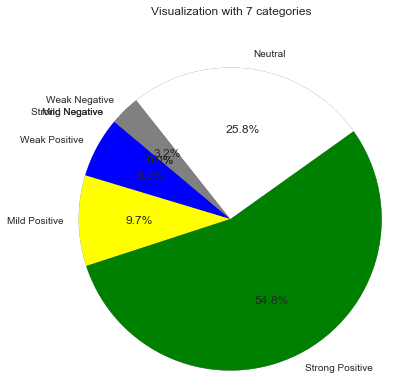

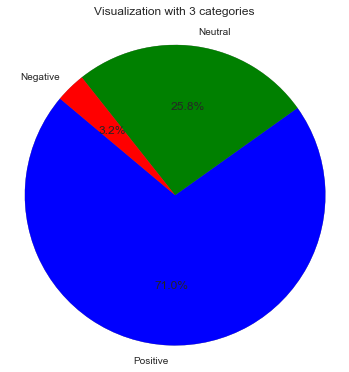

** SENTIMENT ANALYSIS RESULT OF HOTEL: THE RESIDENCY CHENNAI **


********************************************************
TOTAL NEUTRAL IS:28
TOTAL WEAK POSITIVE IS:0
TOTAL MILDLY POSITIVE IS:20
TOTAL STRONGLY POSITIVE IS:40
TOTAL WEAKLY NEGATIVE IS:0
TOTAL MILDY NEGATIVE IS:0
TOTAL STRONGLY NEGATIVE IS:0
********************************************************


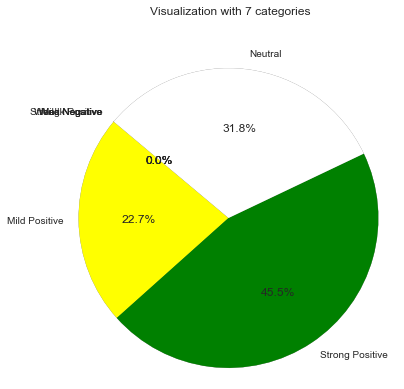

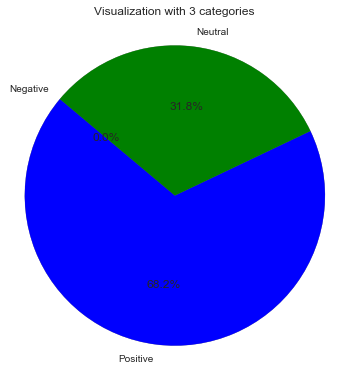

In [20]:
sentiment_analysis_insights('Accord Metropolitan')  
sentiment_analysis_insights('The Residency Chennai')  

<h4> WordCloud Generation<h4>

In [21]:
#Generates a WordCLoud for visualization using the Review Text
def get_WordCloud(hotel_name):
    
    if df[df.Hotel_name == hotel_name].empty:
        print("This hotel name does not exists !")
        
    else:
        review_text = df[df.Hotel_name == hotel_name].iloc[:,2].to_string()
        
        wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(review_text)
        plt.figure(figsize=(10,10))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis('off')
        plt.title("WordCloud for "+hotel_name.upper())
        plt.show
    

<h4>Pass Hotel Name in get_WordCloud() to get a WordCloud Image<h4>

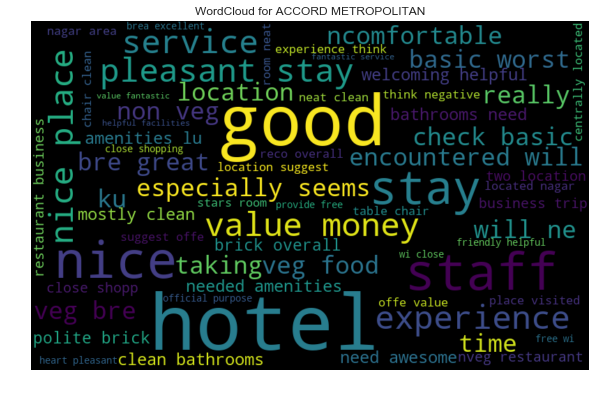

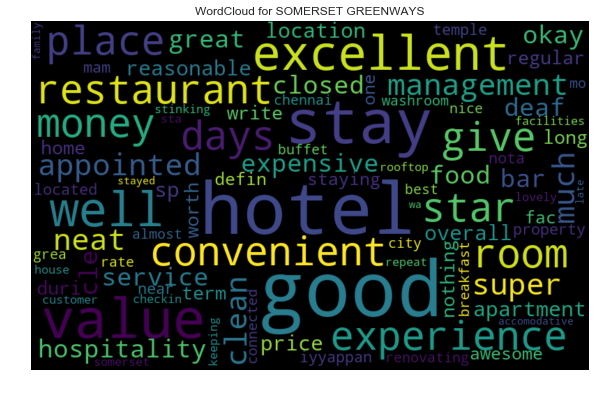

In [22]:
get_WordCloud('Accord Metropolitan')
get_WordCloud('Somerset Greenways')